In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

In [2]:


police = pd.read_csv("data/Police.csv",delimiter = ";")
sinistre = pd.read_csv("data/Sinistre.csv",delimiter = ";")
vehicule = pd.read_csv("data/vehicule.csv",delimiter = ";")
classBonusMalus = pd.read_csv("data/classBonusMalus.csv",delimiter = ";")
epave = pd.read_csv("data/epave.csv",delimiter = ";")
marque = pd.read_excel("data/marque.xlsx",delimiter = ";")
usage = pd.read_excel("data/Usage.xlsx",delimiter = ";")

vehicule = pd.read_csv("data/nouveau/vehicule.csv",delimiter = ";")
assure = pd.read_csv("data/nouveau/assure.csv",delimiter = ";")
usageN = pd.read_csv("data/nouveau/uasgeCga.csv",delimiter = ";")


/Users/devon/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/devon/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
vehicule

,id,numChassis,codeMarque,puissanceFiscal,numImmatriculation,typeImmatriculation,energie,dateInsertion,dateDerniereVisite,dateAjout,etatVehicule,dateMiseEpave,DATE_RETRAIT,dateMiseCirculation,dateMiseAjourVehicule
0,79650,VSSZZZ5FZGR094260,206,6.0,53TU189,TU,ESSENCE,2017-10-05,NaN,2018-02-14 15:37:47.000000,V,NaN,NaN,NaN,NaN
1,79684,KNADN411AG6664007,808,5.0,820TU189,TU,ESSENCE,2017-10-05,NaN,2018-02-14 15:38:14.000000,V,NaN,NaN,NaN,NaN
2,79701,WBAAS71090CK47163,93,8.0,5385TU109,TU,GASOIL,2017-10-05,NaN,2018-02-14 15:38:26.000000,V,NaN,NaN,NaN,NaN
3,79735,ZFA19900000969468,119,4.0,5463TU167,TU,ESSENCE,2017-10-05,NaN,2018-02-14 15:38:53.000000,V,NaN,NaN,NaN,NaN
4,79748,WDD2050401F006754,103,8.0,5103TU182,TU,ESSENCE,2017-10-05,NaN,2018-02-14 15:39:02.000000,V,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92475,297674,UU1FSD30547473751,323,6.0,7316TU160,TU,GASOIL,2017-10-05,NaN,2018-02-19 04:21:50.000000,V,NaN,NaN,NaN,NaN
92476,297773,VF77J9HP0BJ633406,12,5.0,2949TU188,TU,GASOIL,2017-10-05,NaN,2018-02-19 04:36:59.000000,V,NaN,NaN,NaN,NaN
92477,297973,SRP2S33T55918,564,0.0,REM57794,REM,0,2017-10-05,NaN,2018-02-19 05:08:48.000000,V,NaN,NaN,NaN,NaN
92478,297974,ZFA19900001804292,119,5.0,9944TU154,TU,ESSENCE,2017-10-05,NaN,2018-02-19 05:08:51.000000,V,NaN,NaN,NaN,NaN


In [9]:
vehicule_marque=pd.merge(vehicule, marque, left_on='codeMarque', right_on='CD_MARQ')

In [11]:

police_BM=pd.merge(police, classBonusMalus, left_on='id', right_on='police_id')


In [12]:
police_BM.drop(columns=['id_x','id_y'],inplace=True) # ID Y ID BONUS MALUS 

In [13]:
police_BM

,codeCompagnie,codeAgence,typeIntermediaire,code_Courtier_CGA,numPolice,naturePolice,typePolice,dateEffetPolice,dateEcheancePolice,dateExpirationPolice,...,DATE_RETRAIT,date_Calcule,date_Occurence,date_changement_etat,dernierClassBonusMallus,consulter,codeUsage,codeGouvernorat,dateChangementVehicule,statut
0,8,19,1,NaN,10030000605,T,I,2016-04-17,NaN,2017-04-16,...,NaN,2016-04-17 00:00:00.000000,2016-04-17 00:00:00.000000,NaN,1,NaN,2,NaN,NaN,NaN
1,8,90,1,NaN,10080000042,R,I,2016-04-21,421.0,NaN,...,NaN,2019-04-01 00:00:00.000000,2016-04-21 00:00:00.000000,NaN,1,NaN,11,NaN,NaN,NaN
2,8,71,3,NaN,10050000959,R,I,2016-04-26,426.0,NaN,...,NaN,2019-04-01 00:00:00.000000,2019-04-26 00:00:00.000000,NaN,1,NaN,10,NaN,NaN,NaN
3,8,13,1,NaN,10010005016,R,I,2016-05-27,527.0,NaN,...,NaN,2019-05-01 00:00:00.000000,2016-05-27 00:00:00.000000,NaN,1,NaN,1,NaN,NaN,NaN
4,8,36,1,NaN,10020003342,R,I,2016-05-27,527.0,NaN,...,NaN,2019-05-01 00:00:00.000000,2016-05-27 00:00:00.000000,NaN,1,NaN,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93137,11,117,2,NaN,100847028,R,I,2013-10-09,1009.0,NaN,...,NaN,2013-10-09 00:00:00.000000,NaN,NaN,1,NaN,5,NaN,NaN,NaN
93138,11,191,1,NaN,101055188,R,I,2017-03-30,330.0,NaN,...,NaN,2017-03-30 00:00:00.000000,2018-03-29 00:00:00.000000,NaN,1,NaN,1,NaN,NaN,NaN
93139,11,811,2,NaN,101019720,R,I,2016-08-06,806.0,NaN,...,NaN,2019-08-01 00:00:00.000000,2019-08-06 00:00:00.000000,NaN,1,NaN,5,NaN,NaN,NaN
93140,11,186,1,NaN,100878455,R,I,2014-03-28,328.0,NaN,...,NaN,2014-03-28 00:00:00.000000,NaN,NaN,1,NaN,1,NaN,NaN,NaN


In [14]:
#sinistre_BM=pd.merge(police_BM, sinistre, left_on='police_id', right_on='cga_police_id')


In [12]:
assure_BM=pd.merge(assure,police_BM , left_on='id', right_on='assure_id')


In [13]:
BMfinal=pd.merge(vehicule_marque,police_BM, left_on='id', right_on='vehicule_id')


In [14]:
BMfinal.shape

(93142, 66)

In [17]:
BMfinal.drop(columns=['id_x','id_y','ETAT_VEHICULE'],inplace=True)

In [20]:
BMfinal.drop(columns=['DATE_RETRAIT'],inplace=True)

In [15]:
BMfinali=pd.merge(usageN,BMfinal, left_on='code Usage', right_on='codeUsage')
BMfinali.shape

(93140, 71)

In [22]:
BMfinali.drop(columns=['code Usage'],inplace=True)

In [23]:
BMfinali

,lib Usage,numChassis,codeMarque,puissanceFiscal,numImmatriculation,typeImmatriculation,energie,dateInsertion,dateAjout,etatVehicule,...,lieuDuSinistre,identificationTiers,pourcentageDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,pourcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,natureDuSinistre,Calculer_Sinistre
0,Privé et professionnel,VSSZZZ5FZGR180468,206,6.0,9314TU192,TU,ESSENCE,2017-10-05,2018-02-15 19:24:21.000000,V,...,NaN,V,0,20170350750,9.0,0,NaN,NaN,M,0
1,Privé et professionnel,VSSZZZ5FZGR180468,206,6.0,9314TU192,TU,ESSENCE,2017-10-05,2018-02-15 19:24:21.000000,V,...,NaN,V,0,504/659714,14.0,0,NaN,NaN,M,0
2,Privé et professionnel,VSSZZZ6JZDR153494,206,5.0,1762TU166,TU,ESSENCE,2017-10-05,2018-02-15 19:25:59.000000,V,...,NaN,V,0,555N0001775,14.0,0,NaN,NaN,M,0
3,Privé et professionnel,VSSZZZ1PZBR011826,206,6.0,6090TU147,TU,ESSENCE,2017-10-05,2018-02-07 14:05:52.000000,V,...,NaN,NaN,0,201750000033829,1.0,0,8734TU196,TU,M,0
4,Privé et professionnel,VSSZZZ5FZGR034890,206,6.0,244TU188,TU,ESSENCE,2017-10-05,2018-02-07 17:25:18.000000,V,...,NaN,NaN,0,10/101001244,11.0,0,9626TU75,TU,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11729,Engin de Chantiers,103046,1614,12.0,ES21442,ES,GASOIL,2017-10-05,2018-02-15 19:27:37.000000,V,...,NaN,V,100,S170152071,2.0,0,NaN,NaN,M,0
11730,Engin de Chantiers,SMFH44SC07AFM2116,388,18.0,ES15879,ES,GASOIL,2018-02-13,2018-03-21 23:12:09.000000,V,...,TATAOUINE,NaN,100,2015528945,1.0,0,7068TU170,TU,M,0
11731,Engin de Chantiers,010301G4021,1011,10.0,ES26583,ES,GASOIL,2017-10-05,2018-03-01 00:26:46.000000,V,...,EL OMRANE,NaN,100,E13950,12.0,0,NaN,NaN,M,0
11732,Engin de Chantiers,2147483647,2845,10.0,ES27431,ES,GASOIL,2017-10-05,2018-03-01 08:22:07.000000,V,...,ARIANA,NaN,100,2017M15444,12.0,0,7641TU199,TU,M,0


In [25]:
# BMfinali.codeCompagnieAdverse.astype('int64')

In [23]:
BMfinali.to_csv('BMfinali_ex_ante.csv')

In [125]:
nb_sinistre =(BMfinali['cga_vehicule_id'].value_counts()) 
nb_sinistre
nb_sinistre["score_sinistre"]= nb_sinistre.item.add(0)
nb_sinistre


AttributeError: 'function' object has no attribute 'add'

In [165]:
ff = nb_sinistre.to_frame()
ff['score'] = 0

ff=ff.reset_index()
ff
ff.columns=['id','count','score']
ff

,id,count,score
0,558074,12,0
1,574584,7,0
2,247658,6,0
3,12225,6,0
4,247153,5,0
...,...,...,...
10395,1061235,1,0
10396,173505,1,0
10397,41800,1,0
10398,376832,1,0


In [ ]:
points =0
points += df['']+df['']+df['']
points

In [59]:
BMfinali[BMfinali['natureDuSinistre'] == 'M']

,lib Usage,numChassis,codeMarque,puissanceFiscal,numImmatriculation,typeImmatriculation,energie,dateInsertion,dateAjout,etatVehicule,...,lieuDuSinistre,identificationTiers,pourcentageDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,pourcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,natureDuSinistre,Calculer_Sinistre
0,Privé et professionnel,VSSZZZ5FZGR180468,206,6.0,9314TU192,TU,ESSENCE,2017-10-05,2018-02-15 19:24:21.000000,V,...,NaN,V,0,20170350750,9.0,0,NaN,NaN,M,0
1,Privé et professionnel,VSSZZZ5FZGR180468,206,6.0,9314TU192,TU,ESSENCE,2017-10-05,2018-02-15 19:24:21.000000,V,...,NaN,V,0,504/659714,14.0,0,NaN,NaN,M,0
2,Privé et professionnel,VSSZZZ6JZDR153494,206,5.0,1762TU166,TU,ESSENCE,2017-10-05,2018-02-15 19:25:59.000000,V,...,NaN,V,0,555N0001775,14.0,0,NaN,NaN,M,0
3,Privé et professionnel,VSSZZZ1PZBR011826,206,6.0,6090TU147,TU,ESSENCE,2017-10-05,2018-02-07 14:05:52.000000,V,...,NaN,NaN,0,201750000033829,1.0,0,8734TU196,TU,M,0
4,Privé et professionnel,VSSZZZ5FZGR034890,206,6.0,244TU188,TU,ESSENCE,2017-10-05,2018-02-07 17:25:18.000000,V,...,NaN,NaN,0,10/101001244,11.0,0,9626TU75,TU,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11729,Engin de Chantiers,103046,1614,12.0,ES21442,ES,GASOIL,2017-10-05,2018-02-15 19:27:37.000000,V,...,NaN,V,100,S170152071,2.0,0,NaN,NaN,M,0
11730,Engin de Chantiers,SMFH44SC07AFM2116,388,18.0,ES15879,ES,GASOIL,2018-02-13,2018-03-21 23:12:09.000000,V,...,TATAOUINE,NaN,100,2015528945,1.0,0,7068TU170,TU,M,0
11731,Engin de Chantiers,010301G4021,1011,10.0,ES26583,ES,GASOIL,2017-10-05,2018-03-01 00:26:46.000000,V,...,EL OMRANE,NaN,100,E13950,12.0,0,NaN,NaN,M,0
11732,Engin de Chantiers,2147483647,2845,10.0,ES27431,ES,GASOIL,2017-10-05,2018-03-01 08:22:07.000000,V,...,ARIANA,NaN,100,2017M15444,12.0,0,7641TU199,TU,M,0


In [72]:
BMfinali['coeffaccident'] = BMfinali['natureDuSinistre'].apply(lambda x :  1  if (x=='M') else 2)
BMfinali
BMfinali[BMfinali['natureDuSinistre'] == 'C']

,lib Usage,numChassis,codeMarque,puissanceFiscal,numImmatriculation,typeImmatriculation,energie,dateInsertion,dateAjout,etatVehicule,...,identificationTiers,pourcentageDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,pourcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,natureDuSinistre,Calculer_Sinistre,coeffaccident
269,Privé et professionnel,KNADN511AC6735643,808,5.0,3536TU157,TU,ESSENCE,2017-10-05,2018-02-19 01:10:10.000000,V,...,V,100,20170000087349,1.0,0,NaN,NaN,C,0,2
271,Privé et professionnel,KNAKG812XA7712380,808,9.0,4804TU147,TU,ESSENCE,2017-10-05,2018-02-07 17:28:23.000000,V,...,NaN,100,294243,11.0,0,5166TU141,TU,C,0,2
362,Privé et professionnel,KNABJ513AAT940974,808,4.0,9572TU143,TU,ESSENCE,2017-10-05,2018-02-19 18:29:11.000000,V,...,V,100,00108222,7.0,0,NaN,NaN,C,0,2
502,Privé et professionnel,KNADG411AA6695195,808,6.0,1283TU145,TU,ESSENCE,2017-10-05,2018-03-01 01:00:15.000000,V,...,NaN,0,580101846,14.0,100,09-359619,-,C,0,2
748,Privé et professionnel,WBACA11010EL81470,93,7.0,9462TU160,TU,ESSENCE,2017-10-05,2018-02-23 20:17:19.000000,V,...,NaN,100,0139001047,6.0,0,7332TU162,TU,C,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,Transport Rural,VF3BZWJYB86131055,29,7.0,4080TU157,TU,GASOIL,2017-10-05,2018-02-08 21:04:37.000000,V,...,V,0,555108424,14.0,100,6719TU79,TU,C,0,2
11698,Transport Rural,JN1TG4E25Z0716729,338,10.0,390TU129,TU,GASOIL,2017-10-05,2018-02-08 03:20:52.000000,V,...,V,100,4056439,99.0,0,6810TU170,TU,C,0,2
11702,Transport Rural,VF7BZWJYB86233998,12,7.0,8602TU136,TU,GASOIL,2017-10-05,2018-02-08 22:50:44.000000,V,...,V,100,20165000026989,1.0,0,NaN,IT,C,0,2
11709,Transport Rural,JTFRK12P900001155,178,10.0,2175TU121,TU,GASOIL,2017-10-05,2018-02-07 19:09:28.000000,V,...,NaN,100,605253,12.0,0,3520TU133,TU,C,0,2


In [103]:
BMfinali[BMfinali['cga_vehicule_id'] == 247153]

,lib Usage,numChassis,codeMarque,puissanceFiscal,numImmatriculation,typeImmatriculation,energie,dateInsertion,dateAjout,etatVehicule,...,identificationTiers,pourcentageDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,pourcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,natureDuSinistre,Calculer_Sinistre,coeffaccident
8249,Privé et professionnel,JM7BM32Z3F1100239,177,6.0,2515TU176,TU,ESSENCE,2017-10-05,2018-02-18 10:46:01.000000,V,...,NaN,0,2016301041545,13.0,0,791TU125,TU,M,0,1
8250,Privé et professionnel,JM7BM32Z3F1100239,177,6.0,2515TU176,TU,ESSENCE,2017-10-05,2018-02-18 10:46:01.000000,V,...,NaN,100,16100000904,3.0,0,8560TU187,TU,M,0,1
8251,Privé et professionnel,JM7BM32Z3F1100239,177,6.0,2515TU176,TU,ESSENCE,2017-10-05,2018-02-18 10:46:01.000000,V,...,NaN,0,291200672,10.0,0,7149TU180,TU,M,0,1
8252,Privé et professionnel,JM7BM32Z3F1100239,177,6.0,2515TU176,TU,ESSENCE,2017-10-05,2018-02-18 10:46:01.000000,V,...,NaN,0,504115820,14.0,0,8333TU53,TU,M,0,1
8253,Privé et professionnel,JM7BM32Z3F1100239,177,6.0,2515TU176,TU,ESSENCE,2017-10-05,2018-02-18 10:46:01.000000,V,...,NaN,0,1001020113040,15.0,0,4916TU183,TU,M,0,1


In [110]:
for veh in BMfinali[BMfinali['cga_vehicule_id'] == 247153].iterrows() :
    print(veh[1].codeMarque)


177
177
177
177
177


In [208]:
scoree = []
for car in ff.iterrows():
    score = 0
    for veh in BMfinali[BMfinali['cga_vehicule_id'] == car[1][0]].iterrows() :
        score += car[1][1] + veh[1]['pourcentageDeResponsabilite'] + veh[1]['coeffaccident']
    scoree.append(score)   
 


C:\Users\manii\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [210]:
type(scoree)

list

In [218]:
ff

,id,count,score
0,558074,12,1256
1,574584,7,706
2,247658,6,642
3,12225,6,142
4,247153,5,130
...,...,...,...
10395,1061235,1,2
10396,173505,1,102
10397,41800,1,102
10398,376832,1,102


In [213]:
ff['score']= pd.DataFrame(scoree)
ff

,id,count,score
0,558074,12,1256
1,574584,7,706
2,247658,6,642
3,12225,6,142
4,247153,5,130
...,...,...,...
10395,1061235,1,2
10396,173505,1,102
10397,41800,1,102
10398,376832,1,102


In [200]:
for veh in BMfinali[BMfinali['cga_vehicule_id'] == 558074].iterrows() :
    print((veh[1]['pourcentageDeResponsabilite']))
        

100
100
0
100
100
100
100
100
100
100
100
100


In [174]:
BMfinali[BMfinali['cga_vehicule_id'] == ff['id'][1]]

,lib Usage,numChassis,codeMarque,puissanceFiscal,numImmatriculation,typeImmatriculation,energie,dateInsertion,dateAjout,etatVehicule,...,identificationTiers,pourcentageDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,pourcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,natureDuSinistre,Calculer_Sinistre,coeffaccident
9955,Utilitaire 1 véhicule dont le PTC < 3500 kg (y...,JAANKR66E77101546,376,17.0,2748TU181,TU,GASOIL,2017-10-05,2018-02-21 15:17:12.000000,V,...,V,100,501730162,14.0,0,2282TU113,TU,M,0,1
9956,Utilitaire 1 véhicule dont le PTC < 3500 kg (y...,JAANKR66E77101546,376,17.0,2748TU181,TU,GASOIL,2017-10-05,2018-02-21 15:17:12.000000,V,...,V,100,134250619,10.0,0,2676TU117,TU,M,0,1
9957,Utilitaire 1 véhicule dont le PTC < 3500 kg (y...,JAANKR66E77101546,376,17.0,2748TU181,TU,GASOIL,2017-10-05,2018-02-21 15:17:12.000000,V,...,V,50,273023,2.0,50,8636TU155,TU,M,0,1
9958,Utilitaire 1 véhicule dont le PTC < 3500 kg (y...,JAANKR66E77101546,376,17.0,2748TU181,TU,GASOIL,2017-10-05,2018-02-21 15:17:12.000000,V,...,V,100,F91829,12.0,0,2577TU73,TU,M,0,1
9959,Utilitaire 1 véhicule dont le PTC < 3500 kg (y...,JAANKR66E77101546,376,17.0,2748TU181,TU,GASOIL,2017-10-05,2018-02-21 15:17:12.000000,V,...,V,100,100422663,11.0,0,173TU123,TU,M,0,1
9960,Utilitaire 1 véhicule dont le PTC < 3500 kg (y...,JAANKR66E77101546,376,17.0,2748TU181,TU,GASOIL,2017-10-05,2018-02-21 15:17:12.000000,V,...,V,100,T3015588,2.0,0,RS132848,RS,M,0,1
9961,Utilitaire 1 véhicule dont le PTC < 3500 kg (y...,JAANKR66E77101546,376,17.0,2748TU181,TU,GASOIL,2017-10-05,2018-02-21 15:17:12.000000,V,...,V,100,201201239583,9.0,0,9291TU162,TU,M,0,1


In [172]:
ff['id']

0                558074
1                574584
2                247658
3                 12225
4                247153
              ...      
10395           1061235
10396            173505
10397             41800
10398            376832
10399    score_sinistre
Name: id, Length: 10400, dtype: object

In [73]:
BMfinall=pd.merge(BMfinal,assure, left_on='assure_id', right_on='id')


In [79]:
sinistre

,id,sinistre_id,cga_police_id,cga_assure_id,date,numeroDuSinistre,dateDeSurvenanceDuSinistre,heureSurvanceDusinistre,dateOuvertureDuSinistre,lieuDuSinistre,identificationTiers,pourcentadeDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,porcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,mouvementDusinistre,natureDuSinistre,Calculer_Sinistre
0,2,2,174557,144565,NaN,S170155501,2017-12-18,0,2017-12-18,NaN,NaN,100,834736,11.0,0,1651TU133,TU,3,M,0
1,4,4,174560,119709,NaN,S170032921,2017-03-11,0,2017-03-27,NaN,NaN,100,010204000027,4.0,0,3626TU159,TU,3,M,0
2,5,5,174573,144580,NaN,S170144161,2017-11-23,0,2017-11-27,NaN,NaN,0,0101160000565,4.0,0,8312TU163,TU,3,M,0
3,6,6,174581,135912,NaN,S170022571,2017-02-23,0,2017-03-02,NaN,NaN,0,20075.0336001/3,1.0,0,9213TU96,TU,3,M,0
4,7,7,174591,144597,NaN,S170095321,2017-08-08,0,2017-08-10,NaN,NaN,0,505311517,14.0,0,4848TU97,TU,3,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,106959,106959,1577221,140093,NaN,S170122831,2017-09-05,0,2017-10-11,NaN,NaN,100,CI0554N00035580,14.0,0,8426TU122,TU,3,M,0
29996,106960,106960,1577222,140093,NaN,S170118741,2017-08-31,0,2017-10-03,NaN,NaN,100,504145305,14.0,0,856TU176,TU,3,M,0
29997,106961,106961,1577224,140093,NaN,S170026211,2017-03-04,0,2017-03-10,NaN,NaN,100,2015546773/3,1.0,0,1998TU159,TU,3,M,0
29998,106962,106962,1577224,140093,NaN,S170042111,2017-04-01,0,2017-04-12,NaN,NaN,0,580110724,14.0,0,4682TU82,TU,3,M,0


In [81]:
profiling=BMfinall.copy()
profiling.id

Index(['id_x', 'numChassis', 'codeMarque', 'puissanceFiscal',
       'numImmatriculation', 'typeImmatriculation', 'energie', 'dateInsertion',
       'dateDerniereVisite', 'dateAjout', 'etatVehicule', 'dateMiseEpave',
       'DATE_RETRAIT_x', 'dateMiseCirculation', 'dateMiseAjourVehicule',
       'CD_CONST', 'CD_MARQ_CH', 'DESIGL', 'DESIGA', 'DDEB', 'DFIN', 'OBSERV',
       'codeCompagnie', 'codeAgence', 'typeIntermediaire', 'code_Courtier_CGA',
       'numPolice', 'naturePolice', 'typePolice', 'dateEffetPolice',
       'dateEcheancePolice', 'dateExpirationPolice', 'verouillageModifPolice',
       'Etat_Police', 'RESILIATION_ECHEANCE', 'DATE_RESILIATION',
       'Date_Suspenssion', 'dateRemiseEnVigueure', 'police_id', 'vehicule_id',
       'assure_id', 'souscripteur_id', 'classeBonusMalus',
       'classeBonusMalusCompagnie', 'classeBonusMalusCGA', 'coefBonusMalus',
       'coefBonusMalusCompagnie', 'coefBonusMalusCGA', 'DATE_AFFECTATION',
       'CONTRAT_EN_COURS', 'Etat_Donne', 'bonus

In [58]:
profiling.shape

(93140, 10)

In [84]:
profiling.drop_duplicates('police_id',inplace=True)
sinistre.drop_duplicates('cga_police_id',inplace=True)

In [85]:
profiling.set_index('police_id', inplace=True)
sinistre.set_index('cga_police_id', inplace=True)

In [83]:
profiling.reset_index( inplace=True)
sinistre.reset_index( inplace=True)

In [124]:
BMfinall.columns

Index(['id_x', 'numChassis', 'codeMarque', 'puissanceFiscal',
       'numImmatriculation', 'typeImmatriculation', 'energie', 'dateInsertion',
       'dateDerniereVisite', 'dateAjout', 'etatVehicule', 'dateMiseEpave',
       'DATE_RETRAIT_x', 'dateMiseCirculation', 'dateMiseAjourVehicule',
       'CD_CONST', 'CD_MARQ_CH', 'DESIGL', 'DESIGA', 'DDEB', 'DFIN', 'OBSERV',
       'codeCompagnie', 'codeAgence', 'typeIntermediaire', 'code_Courtier_CGA',
       'numPolice', 'naturePolice', 'typePolice', 'dateEffetPolice',
       'dateEcheancePolice', 'dateExpirationPolice', 'verouillageModifPolice',
       'Etat_Police', 'RESILIATION_ECHEANCE', 'DATE_RESILIATION',
       'Date_Suspenssion', 'dateRemiseEnVigueure', 'police_id', 'vehicule_id',
       'assure_id', 'souscripteur_id', 'classeBonusMalus',
       'classeBonusMalusCompagnie', 'classeBonusMalusCGA', 'coefBonusMalus',
       'coefBonusMalusCompagnie', 'coefBonusMalusCGA', 'DATE_AFFECTATION',
       'CONTRAT_EN_COURS', 'Etat_Donne', 'bonus

In [93]:
profiling.loc[174557,'target']

0

In [102]:
testt = profiling.copy()

In [98]:
profiling['target'] = 0

In [99]:
test = 0
for car in sinistre.iterrows():
    idd = car[0]
    #print(idd , ff[ff['idd'] == idd]['score'].iloc[0])
    #print(idd)
    #print(car[1]['cga_vehicule_id'])
    #print(ff[ff['id'] == car[1]['cga_vehicule_id']]['score'].iloc[0])
    #print(ff[ff['id'] ==558074])
    #scorefinal.append( [idd,ff[ff['idd'] == idd]['score'].iloc[0]])
    #profiling[profiling['cga_vehicule_id'] ==idd]['coefSinistre'].iloc[0] = ff[ff['id'] == car[1]['cga_vehicule_id']]['score'].iloc[0]
    profiling.at[idd,'target'] =  1
    

In [197]:
profiling.shape

(35290, 8)

In [196]:
profiling.drop_duplicates('vehicule_id',inplace=True)


/Users/devon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
sinistre.reset_index(inplace=True)

In [117]:
sinistre[sinistre['cga_police_id'] == 97946]

,cga_police_id,id,sinistre_id,cga_assure_id,date,numeroDuSinistre,dateDeSurvenanceDuSinistre,heureSurvanceDusinistre,dateOuvertureDuSinistre,lieuDuSinistre,identificationTiers,pourcentadeDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,porcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,mouvementDusinistre,natureDuSinistre,Calculer_Sinistre
13549,97946,23773,23773,85702,NaN,S011703758,2017-07-04,1207,2017-08-03,NaN,V,0,555N0001775,14.0,0,NaN,NaN,3,M,0


In [189]:
#ccc=pd.merge(usageN,profiling, left_on='code Usage', right_on='codeUsage')
ccc['id_x']

0          79650.0
1          92410.0
2          93832.0
3           6552.0
4           8327.0
           ...    
35444    1019113.0
35445    1064775.0
35446    1063314.0
35447     939656.0
35448      17264.0
Name: id_x, Length: 35449, dtype: float64

In [119]:
zipCodes = pd.read_csv("data/zipcodes.csv", error_bad_lines=False,delimiter = ";")
zipCodes.columns = ['Gouvernorat','Delegation','Localite','codePostale']
zipCodes

b'Skipping line 4788: expected 4 fields, saw 5\n'


,Gouvernorat,Delegation,Localite,codePostale
0,Ariana,Ariana Ville,Cite Des Roses,2080
1,Ariana,Ariana Ville,Centre Commercial Ikram,2037
2,Ariana,Ariana Ville,Cite Du Jardin,2080
3,Ariana,Ariana Ville,Cite Ennasr 1,2037
4,Ariana,Ariana Ville,Cite Du Printemps,2080
...,...,...,...,...
4861,Zaghouan,Zaghouan,Bir Halima,1155
4862,Zaghouan,Zaghouan,Hemiane,1100
4863,Zaghouan,Zaghouan,Sidi Mediene,1155
4864,Zaghouan,Zaghouan,Jimla,1100


In [141]:
profiling.dropna(inplace=True)
profiling.shape

/Users/devon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(34708, 8)

In [120]:
zipCodes.set_index('codePostale',inplace=True)


In [121]:
postal_dict = zipCodes.to_dict()


In [122]:
assue.dropna(inplace=True,axis=0)


NameError: name 'assue' is not defined

In [142]:
profiling['codePostal'] = profiling['codePostal'].astype(int)
profiling['zipLibel'] = profiling['codePostal'].map(postal_dict['Delegation'])
profiling

/Users/devon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/devon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,puissanceFiscal,energie,typePolice,naturePolice,classeBonusMalus,lib Usage,DESIGL,codePostal,zipLibel
0,6.0,ESSENCE,I,R,3.0,Privé et professionnel,SEAT,2052,Ezzouhour (Tunis)
1,6.0,ESSENCE,I,R,4.0,Privé et professionnel,SEAT,2045,La Marsa
2,5.0,ESSENCE,I,R,8.0,Privé et professionnel,SEAT,2092,El Menzah
3,6.0,ESSENCE,I,R,2.0,Privé et professionnel,SEAT,8050,Hammamet
4,6.0,ESSENCE,I,R,3.0,Privé et professionnel,SEAT,3011,Sakiet Eddaier
...,...,...,...,...,...,...,...,...,...
35444,10.0,GASOIL,I,R,4.0,Engin de Chantiers,HELI,1005,El Omrane
35445,10.0,GASOIL,I,R,3.0,Engin de Chantiers,DETANK,2096,Nouvelle Medina
35446,10.0,GASOIL,I,R,2.0,Engin de Chantiers,DETANK,2000,Le Bardo
35447,8.0,GASOIL,I,R,5.0,autres usages (Ambulance / Corbillard / RC Gar...,CITROEN,1074,El Kabbaria


,vehicule_id,puissanceFiscal,energie,typePolice,naturePolice,classeBonusMalus,lib Usage,DESIGL
0,79650.0,6.0,ESSENCE,I,R,3.0,Privé et professionnel,SEAT
1,92410.0,6.0,ESSENCE,I,R,4.0,Privé et professionnel,SEAT
2,93832.0,5.0,ESSENCE,I,R,8.0,Privé et professionnel,SEAT
3,6552.0,6.0,ESSENCE,I,R,2.0,Privé et professionnel,SEAT
4,8327.0,6.0,ESSENCE,I,R,3.0,Privé et professionnel,SEAT
...,...,...,...,...,...,...,...,...
35444,1019113.0,10.0,GASOIL,I,R,4.0,Engin de Chantiers,HELI
35445,1064775.0,10.0,GASOIL,I,R,3.0,Engin de Chantiers,DETANK
35446,1063314.0,10.0,GASOIL,I,R,2.0,Engin de Chantiers,DETANK
35447,939656.0,8.0,GASOIL,I,R,5.0,autres usages (Ambulance / Corbillard / RC Gar...,CITROEN


In [177]:
countSinistre = pd.read_csv('countSinistre.csv')
countSinistre.set_index('id',inplace=True)
countSinistre

,Unnamed: 0,count,score
id,,,
558074,0,12,1256
574584,1,7,706
247658,2,6,642
12225,3,6,142
247153,4,5,130
...,...,...,...
1050996,10394,1,2
1061235,10395,1,2
173505,10396,1,102


In [305]:
profiling = ccc[['vehicule_id','puissanceFiscal','energie','typePolice','naturePolice','classeBonusMalus','lib Usage','DESIGL']]

In [306]:
profiling['sinistreCount'] = 0

/Users/devon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [307]:
profiling.drop_duplicates('vehicule_id',inplace=True)

/Users/devon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [308]:
profiling.set_index('vehicule_id', inplace=True)

In [348]:
for car in countSinistre.iterrows():
    idd = int(car[0])
    #print(idd , ff[ff['idd'] == idd]['score'].iloc[0])
    #print(countSinistre[countSinistre['id'] == idd]['count'])
    #print(car[1]['cga_vehicule_id'])
    #print(ff[ff['id'] == car[1]['cga_vehicule_id']]['score'].iloc[0])
    #print(ff[ff['id'] ==558074])
    #scorefinal.append( [idd,ff[ff['idd'] == idd]['score'].iloc[0]])
    #profiling[profiling['cga_vehicule_id'] ==idd]['coefSinistre'].iloc[0] = ff[ff['id'] == car[1]['cga_vehicule_id']]['score'].iloc[0]
    #if countSinistre[countSinistre['id'] == idd] :
    profiling.at[idd,'sinistreCount'] =  countSinistre.at[idd,'count']


In [353]:
profiling

,puissanceFiscal,energie,typePolice,naturePolice,classeBonusMalus,lib Usage,DESIGL,sinistreCount,SumResponsabilite
vehicule_id,,,,,,,,,
79650.0,6.0,ESSENCE,I,R,3.0,Privé et professionnel,SEAT,0.0,0
92410.0,6.0,ESSENCE,I,R,4.0,Privé et professionnel,SEAT,2.0,0
93832.0,5.0,ESSENCE,I,R,8.0,Privé et professionnel,SEAT,1.0,0
6552.0,6.0,ESSENCE,I,R,2.0,Privé et professionnel,SEAT,1.0,0
8327.0,6.0,ESSENCE,I,R,3.0,Privé et professionnel,SEAT,1.0,0
...,...,...,...,...,...,...,...,...,...
1026312.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
510236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
221417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0


In [333]:
profiling['SumResponsabilite'] = 0

In [247]:
df = sinistre[['cga_vehicule_id','pourcentadeDeResponsabilite']]
df.groupby(['cga_vehicule_id','pourcentadeDeResponsabilite']).sum()


Empty DataFrame
Columns: []
Index: [(6552, 0), (6557, 0), (6891, 0), (6891, 100), (7368, 100), (7422, 100), (7434, 100), (7483, 0), (7483, 100), (7497, 100), (7505, 0), (7515, 50), (7534, 100), (7541, 0), (7604, 100), (7650, 0), (7697, 100), (7732, 100), (7749, 100), (7772, 100), (7781, 0), (7824, 100), (7835, 100), (7842, 100), (7866, 0), (7875, 100), (7906, 100), (7975, 100), (8008, 0), (8009, 0), (8018, 100), (8022, 0), (8024, 100), (8059, 100), (8071, 100), (8077, 0), (8079, 100), (8086, 0), (8097, 100), (8101, 100), (8124, 100), (8152, 100), (8153, 100), (8155, 0), (8161, 0), (8163, 100), (8170, 0), (8181, 100), (8183, 0), (8184, 100), (8185, 0), (8185, 100), (8186, 0), (8189, 100), (8193, 100), (8202, 0), (8206, 0), (8210, 100), (8215, 100), (8232, 100), (8238, 100), (8254, 0), (8267, 100), (8270, 100), (8279, 0), (8279, 100), (8286, 100), (8289, 100), (8301, 0), (8301, 100), (8305, 100), (8308, 100), (8310, 100), (8321, 100), (8323, 100), (8327, 0), (8332, 100), (8355, 100), (8380, 0), (8389, 0), (8414, 100), (8419, 0), (8420, 100), (8438, 100), (8457, 0), (8463, 100), (8485, 0), (8487, 0), (8493, 100), (8499, 0), (8520, 0), (8527, 0), (8531, 100), (8539, 100), (8542, 100), (8543, 0), (8549, 0), (8551, 100), (8564, 0), (8570, 100), ...]

[27877 rows x 0 columns]

In [300]:
ss = df.groupby('cga_vehicule_id').sum()

In [329]:
profiling_res.shape

(35290, 10)

In [354]:
profiling_avant_final = profiling.copy()

In [355]:
for car in ss.iterrows():
    idd = int(car[0])
    profiling_avant_final.loc[idd,'SumResponsabilite'] =  ss.at[idd,'pourcentadeDeResponsabilite']

In [359]:
profiling_avant_final.dropna(inplace=True, axis=0)

In [ ]:
profiling_avant_final.reset_index(inplace=True)

In [361]:
profiling_avant_final.drop_duplicates('vehicule_id', inplace=True)

In [390]:
profiling_avant_final.shape

(35290, 9)

In [363]:
profiling_avant_final.set_index('vehicule_id', inplace=True)

In [392]:
profiling_final['target'] = 0

In [391]:
profiling_final = profiling_avant_final.copy()

In [395]:

sinistre.set_index('cga_vehicule_id', inplace=True)

In [396]:
for car in sinistre.iterrows():
    idd = car[0]
    profiling_final.at[idd,'target'] =  1

In [398]:
profiling_final.dropna(inplace=True, axis=0)

In [374]:
profiling_final.fillna(0, inplace=True)

In [400]:
profiling_final.reset_index(inplace=True)

In [402]:
profiling_final

,vehicule_id,puissanceFiscal,energie,typePolice,naturePolice,classeBonusMalus,lib Usage,DESIGL,sinistreCount,SumResponsabilite,target
0,79650.0,6.0,ESSENCE,I,R,3.0,Privé et professionnel,SEAT,0.0,0.0,0.0
1,92410.0,6.0,ESSENCE,I,R,4.0,Privé et professionnel,SEAT,2.0,0.0,1.0
2,93832.0,5.0,ESSENCE,I,R,8.0,Privé et professionnel,SEAT,1.0,0.0,1.0
3,6552.0,6.0,ESSENCE,I,R,2.0,Privé et professionnel,SEAT,1.0,0.0,1.0
4,8327.0,6.0,ESSENCE,I,R,3.0,Privé et professionnel,SEAT,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
35285,1019113.0,10.0,GASOIL,I,R,4.0,Engin de Chantiers,HELI,1.0,100.0,1.0
35286,1064775.0,10.0,GASOIL,I,R,3.0,Engin de Chantiers,DETANK,0.0,0.0,0.0
35287,1063314.0,10.0,GASOIL,I,R,2.0,Engin de Chantiers,DETANK,1.0,100.0,1.0
35288,939656.0,8.0,GASOIL,I,R,5.0,autres usages (Ambulance / Corbillard / RC Gar...,CITROEN,0.0,0.0,0.0


In [387]:
epave

,id,code_compagnie_id,DATE_TRANSFERT_SINIST_EPV,TYPE_INFO,NUM_LIGNE_SINISTRE,NUM_SINISTRE,NUMERO_POLICE,NUM_IMM_VEH_ADVERSE,TYPE_Immatriculation,TYPE_Immatriculation_ADV,...,NUM_CHASSIS_VEHICULE_EPAVE,DATE_ATTESTATION_RETRAIT,NATURE_EPAVE,TYPE_DE_REGLEMENT,CODE_CIE,REGLEMENT_DU_SINISTRE,ETAT_LIGNE,Tiers,reCalculer,NUM_SEQUENCE
0,381047,17,2018-07-26 00:00:00.000000,e,1,S16511000000070,20145.0033420/2,NaN,TU,NaN,...,0,NaN,T,2,01,D,0,0,0,131
1,381048,17,2018-07-26 00:00:00.000000,e,2,S16511000000550,20135.0700052/2,6806TU61,TU,TU,...,0,NaN,T,2,01,RC,0,0,0,131
2,381049,17,2018-07-26 00:00:00.000000,e,3,S15511000030645,20155.0044802/8,6867TU62,TU,TU,...,0,NaN,E,2,01,RC,0,0,0,131
3,381050,17,2018-07-26 00:00:00.000000,e,4,S16511000001862,20145.0056124/7,6378TU113,TU,TU,...,0,NaN,T,2,01,RC,0,0,0,131
4,381051,17,2018-07-26 00:00:00.000000,e,5,S16511000003443,20155.0094003/4,8862TU61,TU,TU,...,0,NaN,T,2,01,RC,0,0,0,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,268471,26,2018-07-16 00:00:00.000000,e,15,2018200003506,174254521,NaN,TU,NaN,...,178BXA1AAX,NaN,T,NaN,14,RC,0,0,0,103
7205,268472,26,2018-07-16 00:00:00.000000,e,16,2018200003561,021302000011,NaN,TU,NaN,...,6j,NaN,T,NaN,13,RC,0,0,0,103
7206,268473,26,2018-07-16 00:00:00.000000,e,17,2018200004365,960251089,NaN,TU,NaN,...,6j,NaN,E,NaN,10,D,0,0,0,103
7207,268474,26,2018-07-16 00:00:00.000000,e,18,2018200004888,93402000177,NaN,TU,NaN,...,DDHMV0D,NaN,T,NaN,10,D,0,0,0,103


In [412]:
assure_sinistre['NY_with_licence'] = ((pd.to_datetime(assure_sinistre['dateOuvertureDuSinistre']) -pd.to_datetime(assure_sinistre['DATE_OBTENTION'])).dt.days)
assure_sinistre

pd.options.display.float_format = "{:,.2f}".format
assure_sinistre['NY_with_licence']=(assure_sinistre['NY_with_licence']/364)


In [439]:
classBonusMalus

,id,police_id,vehicule_id,assure_id,souscripteur_id,classeBonusMalus,classeBonusMalusCompagnie,classeBonusMalusCGA,coefBonusMalus,coefBonusMalusCompagnie,...,DATE_RETRAIT,date_Calcule,date_Occurence,date_changement_etat,dernierClassBonusMallus,consulter,codeUsage,codeGouvernorat,dateChangementVehicule,statut
0,32696,32700,29293,26960,26960,3,3,3,100,100.00,...,NaN,2016-05-11 00:00:00.000000,2016-05-11 00:00:00.000000,NaN,1,nan,10,nan,NaN,nan
1,33346,33350,28891,26553,26553,1,1,1,80,80.00,...,NaN,2016-08-18 00:00:00.000000,2016-08-18 00:00:00.000000,NaN,1,nan,10,nan,NaN,nan
2,33482,33486,29087,26754,26754,2,2,2,90,90.00,...,NaN,2016-09-20 00:00:00.000000,2016-09-20 00:00:00.000000,NaN,1,nan,10,nan,NaN,nan
3,33496,33500,30651,28321,28321,1,1,1,80,80.00,...,NaN,2016-11-11 00:00:00.000000,2016-11-11 00:00:00.000000,NaN,1,nan,10,nan,NaN,nan
4,33732,33736,30930,28600,28600,1,1,1,80,80.00,...,NaN,2016-11-14 00:00:00.000000,2016-11-14 00:00:00.000000,NaN,1,nan,10,nan,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93137,5087587,279365,248518,53968,53970,5,5,3,120,100.00,...,NaN,2019-04-01 00:00:00.000000,2019-04-24 00:00:00.000000,NaN,1,nan,1,nan,NaN,nan
93138,5087630,290161,258628,244377,244302,9,9,8,250,250.00,...,NaN,2019-04-01 00:00:00.000000,2019-04-13 00:00:00.000000,NaN,1,nan,1,nan,NaN,nan
93139,5087651,501337,430216,411560,411584,4,5,4,100,120.00,...,NaN,2019-04-01 00:00:00.000000,2019-04-27 00:00:00.000000,NaN,1,nan,1,nan,NaN,nan
93140,5087994,499969,428853,238104,238029,7,7,3,200,120.00,...,NaN,2019-04-01 00:00:00.000000,2019-04-23 00:00:00.000000,NaN,1,nan,6,nan,NaN,nan


In [418]:
assure_sinistre_classBonusMalus=pd.merge(assure_sinistre, classBonusMalus, left_on='id_x', right_on='assure_id')


In [575]:
assure_sinistre_classBonusMalus.NY_with_licence

vehicule_id
1545341   35.24
52270     34.81
49074     35.61
1036163   31.71
20753     31.87
           ... 
152449    22.30
339816    19.35
13272      5.63
37289     28.10
12803     14.32
Name: NY_with_licence, Length: 10428, dtype: float64

In [454]:
#assure_sinistre_classBonusMalus.set_index('vehicule_id',inplace=True)


In [421]:
profiling_final_date = profiling_final.copy()

In [570]:
#profiling_final_date.set_index('vehicule_id',inplace=True)
#profiling_final_date.vehicule_id = profiling_final_date.vehicule_id.astype(int)
profiling_final_date.NY_with_licence = 0

In [576]:

for car in profiling_final_date.iterrows():
    idd = car[0]
    #print(idd)
    if idd in assure_sinistre_classBonusMalus.index:
        profiling_final_date.loc[idd,'NY_with_licence'] =  assure_sinistre_classBonusMalus.NY_with_licence[idd]


In [559]:
from datetime import datetime

(datetime.today() - pd.to_datetime('2016-11-11 00:00:00.000000')).days


1214

In [499]:
classBonusMalus_assure = pd.merge(classBonusMalus,assure,left_on='assure_id', right_on='id')

In [507]:
classBonusMalus_assure.set_index('vehicule_id', inplace=True)

In [578]:
for car in profiling_final_date.iterrows():
    idd = car[0]
    #print(idd)
    if  profiling_final_date.NY_with_licence[idd] ==0:
        profiling_final_date.at[idd,'NY_with_licence'] =  ((datetime.today() - pd.to_datetime(classBonusMalus_assure.DATE_OBTENTION[idd]))).days/364


In [579]:
profiling_final_date.NY_with_licence.unique()

array([28.84065934,  3.81318681, 15.29395604, ..., 22.66758242,
       16.62637363, 50.30769231])

In [581]:
profiling_final = profiling_final_date.copy()

In [598]:
profiling_clean = profiling_final.copy()

In [595]:
profiling_final

,puissanceFiscal,energie,typePolice,naturePolice,classeBonusMalus,lib Usage,DESIGL,sinistreCount,SumResponsabilite,NY_with_licence,target
0,6.00,ESSENCE,I,R,3.00,Privé et professionnel,SEAT,0.00,0.00,28.84,0.00
1,6.00,ESSENCE,I,R,4.00,Privé et professionnel,SEAT,2.00,0.00,3.81,1.00
2,5.00,ESSENCE,I,R,8.00,Privé et professionnel,SEAT,1.00,0.00,15.29,1.00
3,6.00,ESSENCE,I,R,2.00,Privé et professionnel,SEAT,1.00,0.00,37.13,1.00
4,6.00,ESSENCE,I,R,3.00,Privé et professionnel,SEAT,1.00,0.00,16.11,1.00
...,...,...,...,...,...,...,...,...,...,...,...
35285,10.00,GASOIL,I,R,4.00,Engin de Chantiers,HELI,1.00,100.00,31.63,1.00
35286,10.00,GASOIL,I,R,3.00,Engin de Chantiers,DETANK,0.00,0.00,31.78,0.00
35287,10.00,GASOIL,I,R,2.00,Engin de Chantiers,DETANK,1.00,100.00,19.76,1.00
35288,8.00,GASOIL,I,R,5.00,autres usages (Ambulance / Corbillard / RC Gar...,CITROEN,0.00,0.00,22.89,0.00


In [603]:
columns_to_encode = list(profiling_final.select_dtypes(include = "object"))
columns_to_scale  = list(profiling_final.select_dtypes(exclude="object").columns) 
# Instantiate encoder/scaler
scaler = MinMaxScaler()
ohe    = OneHotEncoder(sparse=False)
scaled_columns  = scaler.fit_transform(profiling_final[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(profiling_final[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
processed_data = np.concatenate([profiling_final[columns_to_scale], encoded_columns], axis=1)
# storing the new data in a new dataframe and dropping one column for each encoded categorical 
# variable to avoid  the dummy variable trap
testfinal = pd.DataFrame(processed_data)

In [604]:
testfinal

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,6.00,3.00,0.00,0.00,28.84,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,6.00,4.00,2.00,0.00,3.81,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,5.00,8.00,1.00,0.00,15.29,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,6.00,2.00,1.00,0.00,37.13,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,6.00,3.00,1.00,0.00,16.11,1.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35285,10.00,4.00,1.00,100.00,31.63,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35286,10.00,3.00,0.00,0.00,31.78,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35287,10.00,2.00,1.00,100.00,19.76,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35288,8.00,5.00,0.00,0.00,22.89,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [609]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [607]:
sc = StandardScaler()

In [608]:
Z = sc.fit_transform(testfinal)

In [610]:
acp = PCA(svd_solver='full')

In [611]:
coord = acp.fit_transform(Z)

In [614]:
print(acp.n_components_) 

157


In [612]:
print(acp.explained_variance_)

[3.95324699e+00 2.67650273e+00 2.24568575e+00 2.04567601e+00
 2.00745303e+00 1.99762957e+00 1.86525022e+00 1.82087136e+00
 1.70907531e+00 1.44272501e+00 1.29432811e+00 1.27593932e+00
 1.22465159e+00 1.21986085e+00 1.16333393e+00 1.15960006e+00
 1.15380430e+00 1.13177680e+00 1.10843957e+00 1.09540671e+00
 1.07013154e+00 1.05253269e+00 1.04831001e+00 1.04336561e+00
 1.03955279e+00 1.03673193e+00 1.03400773e+00 1.02710639e+00
 1.02398183e+00 1.02184559e+00 1.01833667e+00 1.01677151e+00
 1.01425155e+00 1.01291709e+00 1.01110245e+00 1.00950398e+00
 1.00551185e+00 1.00448227e+00 1.00337565e+00 1.00318922e+00
 1.00260673e+00 1.00212666e+00 1.00195373e+00 1.00149974e+00
 1.00141144e+00 1.00134368e+00 1.00118404e+00 1.00106650e+00
 1.00099857e+00 1.00098744e+00 1.00089714e+00 1.00076543e+00
 1.00069868e+00 1.00066798e+00 1.00063845e+00 1.00062761e+00
 1.00058343e+00 1.00052561e+00 1.00045115e+00 1.00044587e+00
 1.00038671e+00 1.00037356e+00 1.00035326e+00 1.00032507e+00
 1.00028608e+00 1.000281

In [615]:
eigval = (157-1)/157*acp.explained_variance_
print(eigval)

[3.92806708e+00 2.65945494e+00 2.23138202e+00 2.03264622e+00
 1.99466670e+00 1.98490581e+00 1.85336964e+00 1.80927345e+00
 1.69818948e+00 1.43353567e+00 1.28608399e+00 1.26781232e+00
 1.21685126e+00 1.21209103e+00 1.15592416e+00 1.15221407e+00
 1.14645523e+00 1.12456803e+00 1.10137945e+00 1.08842960e+00
 1.06331542e+00 1.04582866e+00 1.04163288e+00 1.03671996e+00
 1.03293144e+00 1.03012855e+00 1.02742170e+00 1.02056431e+00
 1.01745966e+00 1.01533701e+00 1.01185045e+00 1.01029526e+00
 1.00779135e+00 1.00646539e+00 1.00466230e+00 1.00307402e+00
 9.99107316e-01 9.98084298e-01 9.96984725e-01 9.96799475e-01
 9.96220700e-01 9.95743688e-01 9.95571862e-01 9.95120757e-01
 9.95033023e-01 9.94965696e-01 9.94807067e-01 9.94690276e-01
 9.94622786e-01 9.94611726e-01 9.94522003e-01 9.94391133e-01
 9.94324803e-01 9.94294301e-01 9.94264956e-01 9.94254185e-01
 9.94210289e-01 9.94152836e-01 9.94078847e-01 9.94073601e-01
 9.94014820e-01 9.94001752e-01 9.93981582e-01 9.93953573e-01
 9.93914836e-01 9.939105

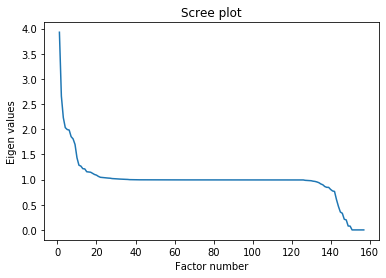

In [621]:
plt.plot(np.arange(1,157+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

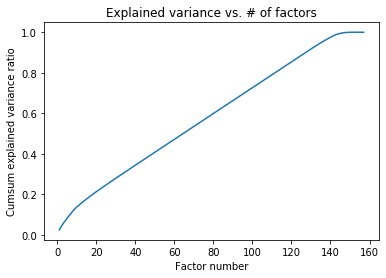

In [623]:
plt.plot(np.arange(1,157+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()